<a href="https://colab.research.google.com/github/yash7125/makemore/blob/main/makemore_II_MLP_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
names = open('names.txt', 'r').read().splitlines()
print(names[:10])

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [2]:
chs = sorted((list(set(''.join(names)))))
print(chs)

stoi = {s:i+1 for i,s in enumerate(chs)}
stoi['.'] = 0
print(stoi)
itos = {i:s for s,i in stoi.items()}
print(itos)



['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [3]:
# import torch

# # creating our dataset
# block_size = 3
# X = []
# Y = []

# for name in names:

#   context = [0] * block_size
#   # print(name)

#   for ch in name + '.':
#     idx = stoi[ch]
#     X.append(context)
#     Y.append(idx)
#     # print(''.join(itos[i] for i in context) + '-->' + itos[idx])
#     context = context[1:] + [idx]
#     # print(context)

#   # print('\n')

# X = torch.tensor(X)
# Y = torch.tensor(Y)


In [4]:
# C = torch.randn((27, 2))

In [5]:
# emb = C[X]
# emb.shape

In [6]:
# # W1 = torch.randn((6, 100))
# # b1 = torch.randn(100)
#     # (32, 6) * (6, 100) --> (32 * 100)
# h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1)
# h.shape


In [7]:
# W2 = torch.randn((100, 27))
# b2 = torch.randn(27)

# logits = (h @ W2) + b2
# counts = logits.exp()

# probs = counts / counts.sum(1, keepdims=True)
# probs[0].sum()


In [8]:
# loss = -probs[torch.arange(32), Y].log().mean()
# loss

In [53]:
# creating train, val, test set
import torch

def build_dataset(names):

  X = []
  Y = []

  block_size = 8

  for name in names:

    context = [0] * block_size
    # print(name)
    for ch in name + '.':
      idx = stoi[ch]
      X.append(context)
      Y.append(idx)
      # print(''.join(itos[i] for i in context) + '-->' + itos[idx])
      context = context[1:] + [idx]
      # print(context)

    # print('\n')

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, " ", Y.shape)
  return X, Y

n1 = int(0.8 * len(names))
n2 = int(0.9 * len(names))

import random

random.seed(42)
random.shuffle(names)

X_train, Y_train = build_dataset(names[:n1])
val_X, val_Y =  build_dataset(names[n1 : n2])
test_X, test_Y = build_dataset(names[n2:])

torch.Size([182441, 8])   torch.Size([182441])
torch.Size([22902, 8])   torch.Size([22902])
torch.Size([22803, 8])   torch.Size([22803])


In [60]:
for x, y in zip(X_train[:20], Y_train[:20]):
  print(''.join(itos[idx.item()] for idx in x), " --> ", itos[y.item()])

........  -->  e
.......e  -->  l
......el  -->  i
.....eli  -->  a
....elia  -->  n
...elian  -->  y
..eliany  -->  s
.elianys  -->  .
........  -->  t
.......t  -->  r
......tr  -->  o
.....tro  -->  y
....troy  -->  .
........  -->  m
.......m  -->  a
......ma  -->  r
.....mar  -->  k
....mark  -->  u
...marku  -->  s
..markus  -->  .


In [61]:
# making thing much more simpler and easy to read
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

# import random

g = torch.Generator().manual_seed(2147483647)

# C = torch.randn((27, 10), generator=g)
# W1 = torch.randn((30, 200), generator=g) * ((5 / 3) / (30 ** 0.5))
# # b1 = torch.randn(200, generator=g) * 0.01
# W2 = torch.randn((200, 27), generator=g) * 0.01
# b2 = torch.randn(27, generator=g) * 0

# bngain = torch.ones((1, 200))
# bnbias = torch.zeros(200)

# bnmean_running = torch.zeros((200, 1))
# bnstd_running = torch.ones((200, 1))

# parameters = [C, W1, W2, b2, bngain, bnbias]


In [ ]:
# logits = torch.tensor([0.5, 0.0, 0.3, 0.0])
# act = F.softmax(logits, dim=0)
# print(act)

# -torch.tensor([1 / 27.0]).log()


In [ ]:

# sum(p.nelement() for p in parameters)


In [ ]:
# iterations = []
# losses = []
# lri = []

# for p in parameters:
#   # p.requires_grad = True


In [ ]:

  # for i in range(200000):
  #   # mini-batches
  #   idx = torch.randint(0, X_train.shape[0], (32,))

  #   # implementing forward pass
  #   # (32, 3, 2)
  #   emb = C[X_train[idx]]

  #   # (32, 6) * (6, 100) --> (32, 100) first hidden layer
  #   hpreact = emb.view(-1, 30) @ W1

  #   bnmeani = hpreact.mean(0, keepdim=True)
  #   bnstdi = hpreact.std(0, keepdim=True)

  #   hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias

  #   with torch.no_grad():
  #     bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
  #     bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi

  #   h = torch.tanh(hpreact)
  #   # second hidden layer
  #   logits = h @ W2 + b2
  #   # counts = logits.exp()
  #   # probs = counts / counts.sum(1, keepdims=True)
  #   loss = F.cross_entropy(logits, Y_train[idx])

  #   # print(i + 1, " ", loss.item())

  #   iterations.append(i + 1)
  #   losses.append(loss.log10().item())

  #   # back propagation
  #   for p in parameters:
  #     p.grad = None
  #   loss.backward()

  #   # lr = lrs[i]
  #   # lri.append(lre[i])

  #   # print(i + 1, " ", loss.item(), " ", "lr-->", lr.item())

  #   lr = 0.1 if i < 100000 else 0.01
  #   # update the parameters
  #   for p in (parameters):
  #     p.data += -lr * p.grad

  #   if i % 10000 == 0:
  #     print(i, " ", loss.item())

  #   # print(h)

  #   # break

In [ ]:
# b1.grad.shape

# hpreact.shape
# hpreact.mean(0, keepdim=True).shape

# plt.hist(h.view(-1).tolist(), 50)
# plt.show()

# # plt.plot(iterations[1:], losses[1:])
# # # mini batches are needed
# # idx = torch.randint(0, X.shape[0], (32,))
# # idx
# # emb = C[X]
# # emb.shape
# # loss

In [ ]:
# <---------------------summary and pythorchifying everything----------------------------->

In [41]:
class Linear:

  def __init__(self, features_in, features_out, bias = True):

    self.weight = torch.randn((features_in, features_out), generator=g) / features_in**0.5
    self.bias = torch.randn(features_out) if bias else None

  def __call__(self, x):

    self.out = x @ self.weight
    if self.bias is not None:
      self.out += self.bias
    return self.out

  def parameters(self):
    return [self.weight] + ([] if self.bias is None else [self.bias])

# <---------------------------------------------------------------------------------------->

class BatchNorm1d:

  def __init__(self, num_features, momentum=0.1, eps=1e-5):

    self.training = True
    self.num_features = num_features
    self.momentum = momentum
    self.eps = eps

    self.gamma = torch.ones(num_features)
    self.beta = torch.zeros(num_features)

    self.running_mean = torch.zeros(num_features)
    self.running_var = torch.ones(num_features)

  def __call__(self, x):

    if self.training:
      xmean = x.mean(0, keepdim = True)
      xvar  = x.var(0, keepdim = True)
    else:
      xmean = self.running_mean
      xvar = self.running_var

    xhat = (x - xmean) / torch.sqrt(xvar + self.eps)
    self.out = self.gamma * xhat + self.beta

    if self.training:
      with torch.no_grad():
        self.running_mean = (1 - self.momentum) * self.running_mean + (self.momentum) * xmean
        self.running_var = (1 - self.momentum)  * self.running_var + (self.momentum)  * xvar

    return self.out

  def parameters(self):
    return [self.gamma, self.beta]

# <---------------------------------------------------------------------------------------->

class Tanh:
  def __call__(self, x):
    self.out = torch.tanh(x)
    return self.out

  def parameters(self):
    return []

# <---------------------------------------------------------------------------------------->

class Embedding:

  def __init__(self, num_embedding, embedding_dim):
    self.weight = torch.randn(num_embedding, embedding_dim)

  def __call__(self, ix):
    self.out = self.weight[ix]
    return self.out

  def parameters(self):
    return [self.weight]

class FlattenConsecutive:

  def __init__(self, n):
    self.n = n

  def __call__(self, x):
    B, C, E = x.shape
    self.out = x.view(B, C // self.n, E*self.n)
    return self.out

  def parameters(self):
    return []

# <---------------------------------------------------------------------------------------->

class Sequential:

  def __init__(self, layers):
    self.layers = layers

  # forward prop
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    self.out = x
    return self.out

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

# <---------------------------------------------------------------------------------------->

emb = 10
block_size = 8
n_hidden = 200
vocab_size = 27

model = Sequential([
    Embedding(vocab_size, emb),
    # hidden layers
    FlattenConsecutive(2), Linear(2 * emb, n_hidden, bias = False), BatchNorm1d(n_hidden), Tanh(),
    FlattenConsecutive(2), Linear(2 * n_hidden, n_hidden, bias = False), BatchNorm1d(n_hidden), Tanh(),
    FlattenConsecutive(2), Linear(2 * n_hidden, n_hidden, bias = False), BatchNorm1d(n_hidden), Tanh(),
    # softmax
    Linear(n_hidden, vocab_size),
])

with torch.no_grad():
  # make last layer less confident
  model.layers[-1].weight *= 0.1
  # model.layers[-1].gamma *= 0.1
  # make init more reliable
  for layer in model.layers[:-1]:
    if isinstance(layer, Linear):
      layer.weight *= (5 / 3)


parameters = model.parameters()
for p in parameters:
  p.requires_grad = True

sum(p.nelement() for p in parameters)


12097

In [42]:
max_steps = 200000
batch_size = 32
ud = []
losses = []
iterations = []

In [66]:
idx = torch.randint(0, X_train.shape[0], (4,))
Xb = X_train[idx]

logits = model(Xb)
logits.shape



RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x80 and 30x200)

In [45]:
for i in range(max_steps):
  # mini-batches
  idx = torch.randint(0, X_train.shape[0], (batch_size,))
  Xtr = X_train[idx]
  Ytr = Y_train[idx]

  # forward pass
  logits = model(Xtr)

  # calculate the loss
  loss = F.cross_entropy(logits, Ytr)

  losses.append(loss.log10().item())
  iterations.append(i)

  # backward pass
  for p in model.parameters():
    p.grad = None
  loss.backward()

  # update the parameters
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  if i % 10000 == 0:
    print(f'{i}: {loss.item()}')

  with torch.no_grad():
      ud.append([(lr*p.grad.std() / p.data.std()).log10().item() for p in parameters])

  # if i > 1000:
  #   # print(f'{i}: {loss.item()}')
  # break



0: 3.8852813243865967
10000: 2.423593521118164
20000: 2.3286116123199463
30000: 2.125335693359375
40000: 2.208073854446411
50000: 1.8936189413070679
60000: 2.146699905395508
70000: 2.347569704055786
80000: 2.2507379055023193
90000: 2.0560989379882812
100000: 2.10856294631958
110000: 2.2294504642486572
120000: 1.9587836265563965
130000: 2.1698501110076904
140000: 2.40964412689209
150000: 2.430373430252075
160000: 1.9766045808792114
170000: 2.17199969291687
180000: 2.1139795780181885
190000: 2.36685848236084


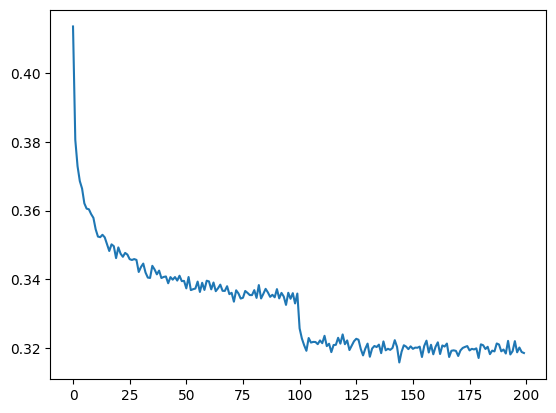

In [49]:
len(losses)
lossi = losses[:200000]
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1))
plt.show()

In [47]:
# # visualize histograms for activations
# plt.figure(figsize=(20, 4)) # width and height of the plot
# legends = []
# for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
#   if isinstance(layer, Tanh):
#     t = layer.out
#     print('layer %d (%10s): mean %+.2f, std %.2f, saturated: %.2f%%' % (i, layer.__class__.__name__, t.mean(), t.std(), (t.abs() > 0.97).float().mean()*100))
#     hy, hx = torch.histogram(t, density=True)
#     plt.plot(hx[:-1].detach(), hy.detach())
#     legends.append(f'layer {i} ({layer.__class__.__name__}')
# plt.legend(legends);
# plt.title('activation distribution')

layer 2 (      Tanh): mean +0.000000, std 4.182572e-03
layer 5 (      Tanh): mean +0.000000, std 3.816320e-03
layer 8 (      Tanh): mean -0.000000, std 3.707996e-03
layer 11 (      Tanh): mean -0.000000, std 3.539059e-03
layer 14 (      Tanh): mean +0.000000, std 3.866387e-03


Text(0.5, 1.0, 'gradient distribution')

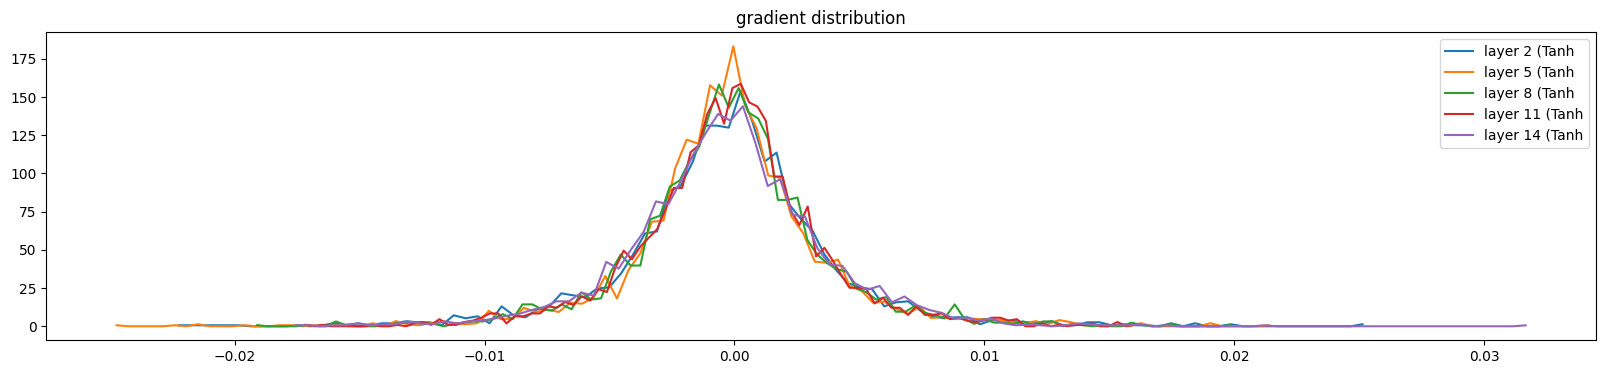

In [ ]:
# # visualize histograms for gradients
# plt.figure(figsize=(20, 4)) # width and height of the plot
# legends = []
# for i, layer in enumerate(layers[:-1]): # note: exclude the output layer
#   if isinstance(layer, Tanh):
#     t = layer.out.grad
#     print('layer %d (%10s): mean %+f, std %e' % (i, layer.__class__.__name__, t.mean(), t.std()))
#     hy, hx = torch.histogram(t, density=True)
#     plt.plot(hx[:-1].detach(), hy.detach())
#     legends.append(f'layer {i} ({layer.__class__.__name__}')
# plt.legend(legends);
# plt.title('gradient distribution')

weight   (27, 10) | mean -0.000000 | std 1.732761e-02 | grad:data ratio 1.652516e-02
weight  (30, 100) | mean +0.000065 | std 9.463370e-03 | grad:data ratio 2.305784e-02
weight (100, 100) | mean +0.000146 | std 6.049059e-03 | grad:data ratio 2.465835e-02
weight (100, 100) | mean +0.000022 | std 5.864581e-03 | grad:data ratio 2.428842e-02
weight (100, 100) | mean -0.000064 | std 5.617208e-03 | grad:data ratio 2.366425e-02
weight (100, 100) | mean -0.000009 | std 5.571632e-03 | grad:data ratio 2.428310e-02
weight  (100, 27) | mean -0.000209 | std 1.105455e-02 | grad:data ratio 3.338267e-02


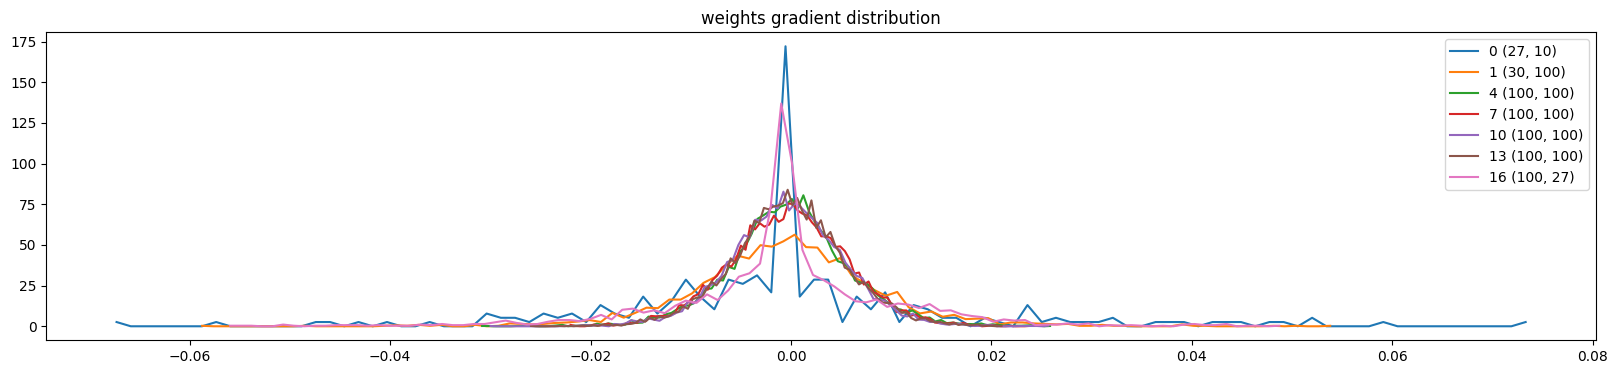

In [ ]:
# # visualize histograms
# plt.figure(figsize=(20, 4)) # width and height of the plot
# legends = []
# for i,p in enumerate(parameters):
#   t = p.grad
#   if p.ndim == 2:
#     print('weight %10s | mean %+f | std %e | grad:data ratio %e' % (tuple(p.shape), t.mean(), t.std(), t.std() / p.std()))
#     hy, hx = torch.histogram(t, density=True)
#     plt.plot(hx[:-1].detach(), hy.detach())
#     legends.append(f'{i} {tuple(p.shape)}')
# plt.legend(legends)
# plt.title('weights gradient distribution');

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


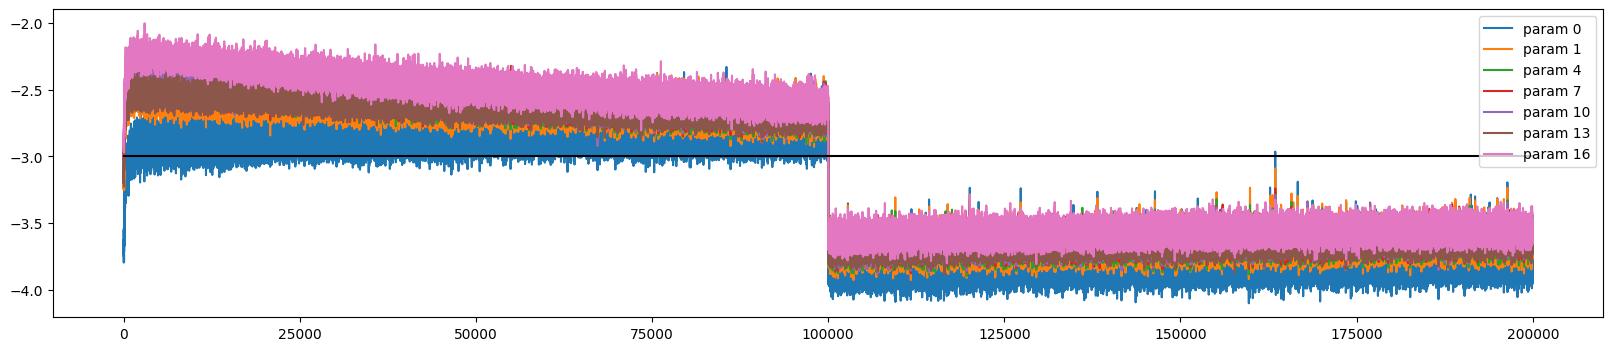

In [ ]:
# plt.figure(figsize=(20, 4))
# legends = []
# for i,p in enumerate(parameters):
#   if p.ndim == 2:
#     plt.plot([ud[j][i] for j in range(len(ud))])
#     legends.append('param %d' % i)
# plt.plot([0, len(ud)], [-3, -3], 'k') # these ratios should be ~1e-3, indicate on plot
# plt.legend(legends);

In [50]:
for layer in model.layers:
  layer.training = False

In [51]:
@torch.no_grad() # this decorator disables gradient tracking
def split_loss(split):
  x,y = {
    'train': (Xtr, Ytr),
    'val': (val_X, val_Y),
    'test': (test_X, test_Y),
  }[split]
  # emb = C[x] # (N, block_size, n_embd)
  # x = emb.view(emb.shape[0], -1) # concat into (N, block_size * n_embd)
  # for layer in layers:
  #   x = layer(x)
  logits = model(x)
  loss = F.cross_entropy(logits, y)
  print(split, loss.item())

# put layers into eval mode

split_loss('train')
split_loss('val')

train 1.6844823360443115
val 2.124753475189209


In [52]:
for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      # forward pass the neural net
      logits = model(torch.tensor([context])) # (1,block_size,n_embd)
      probs = F.softmax(logits, dim=1)
      # sample from the distribution
      ix = torch.multinomial(probs, num_samples=1).item()
      # shift the context window and track the samples
      context = context[1:] + [ix]
      out.append(ix)
      # if we sample the special '.' token, break
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

tacyh.
amilio.
cecie.
ole.
muhaa.
zan.
adelio.
azlla.
demilylani.
merles.
den.
atzurya.
trulie.
zochi.
kleh.
marainna.
joreen.
cris.
jaxx.
madeanna.


In [ ]:
# # train set
# emb = C[X_train]
# hpreact = emb.view(-1, 30) @ W1

# bnmeani = hpreact.mean(0, keepdim=True)
# bnstdi = hpreact.std(0, keepdim=True)

# hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias

# h = torch.tanh(hpreact)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, Y_train)
# loss

tensor(2.0667, grad_fn=<NllLossBackward0>)

In [ ]:
# emb = C[val_X]
# hpreact = emb.view(-1, 30) @ W1

# bnmeani = hpreact.mean(0, keepdim=True)
# bnstdi = hpreact.std(0, keepdim=True)

# hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias
# #
# h = torch.tanh(hpreact)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, val_Y)
# loss

tensor(2.1130, grad_fn=<NllLossBackward0>)

In [ ]:
# emb = C[test_X]
# hpreact = emb.view(-1, 30) @ W1

# bnmeani = hpreact.mean(0, keepdim=True)
# bnstdi = hpreact.std(0, keepdim=True)

# hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias

# h = torch.tanh(hpreact)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, test_Y)
# loss

tensor(2.1127, grad_fn=<NllLossBackward0>)

In [ ]:
# g = torch.Generator().manual_seed(2147483647)

# block_size = 3

# for i in range(20):

#   context = [0] * block_size
#   out = []
#   while True:

#     emb = C[torch.tensor([context])]
#     hpreact = emb.view(-1, 30) @ W1

#     bnmeani = hpreact.mean(0, keepdim=True)
#     bnstdi = hpreact.std(0, keepdim=True)

#     hpreact = (bngain * ((hpreact - bnmeani)) / (bnstdi + 0.001)) + bnbias
#     h = torch.tanh(hpreact)

#     logits = h @ W2 + b2
#     probs = F.softmax(logits, dim=1)
#     idx = torch.multinomial(probs, num_samples=1, generator=g).item()
#     context = context[1:] + [idx]
#     if idx == 0:
#       break
#     out.append(idx)

#   print(''.join(itos[j] for j in out))




/tmp/ipython-input-117-2039021057.py:15: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /pytorch/aten/src/ATen/native/ReduceOps.cpp:1831.)
  bnstdi = hpreact.std(0, keepdim=True)


RuntimeError: probability tensor contains either `inf`, `nan` or element < 0